In [101]:
import pandas as pd
import numpy as np
import seaborn as sns

In [157]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [150]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [151]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [152]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [153]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [158]:
data.dtypes
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [155]:
data.dtypes
data1 = data
data1['GRE Score'] = data1['GRE Score']/340*(100)
data1['TOEFL Score'] = data1['TOEFL Score']/120*(100)
data1['CGPA'] = data1['CGPA'] *10
data1['Chance of Admit'] = data1['Chance of Admit']*100

In [159]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [143]:
dt = data1[['GRE Score','TOEFL Score','CGPA','Chance of Admit']]
dt1 = dt.groupby(['Chance of Admit']).mean()

In [144]:
dt2 = dt1.loc[dt1.index%10 == 0]
dt3 = dt2.append(dt1.iloc[[-1]])

In [145]:
dt3

,GRE Score,TOEFL Score,CGPA
Chance of Admit,,,
50.0,90.294118,86.250000,80.100000
60.0,88.970588,88.333333,78.550000
70.0,92.941176,88.589744,84.346154
80.0,94.954751,92.179487,88.946154
90.0,97.222222,96.759259,93.244444
97.0,99.264706,99.791667,98.750000


In [146]:
dt3.reset_index(level=0, inplace=True)
dt3

,Chance of Admit,GRE Score,TOEFL Score,CGPA
0,50.0,90.294118,86.250000,80.100000
1,60.0,88.970588,88.333333,78.550000
2,70.0,92.941176,88.589744,84.346154
3,80.0,94.954751,92.179487,88.946154
4,90.0,97.222222,96.759259,93.244444
5,97.0,99.264706,99.791667,98.750000


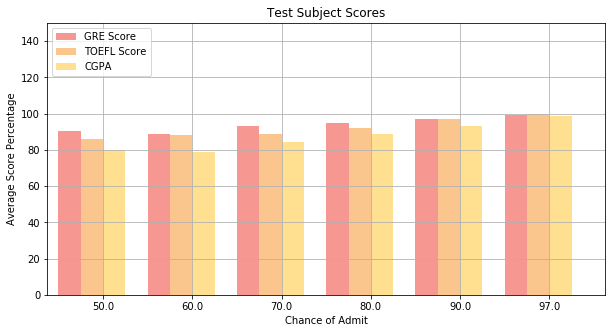

In [147]:
pos = list(range(len(dt3['GRE Score']))) 
width = 0.25 

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos, 
        
        dt3['GRE Score'], 
        
        width, 
    
        alpha=0.5, 
        
        color='#EE3224', 
        
        label=dt3['Chance of Admit'][0]) 


plt.bar([p + width for p in pos], 
        
        dt3['TOEFL Score'],
        
        width, 
       
        alpha=0.5, 
       
        color='#F78F1E', 
        
        label=dt3['Chance of Admit'][1]) 


plt.bar([p + width*2 for p in pos], 
        
        dt3['CGPA'], 
        
        width, 
        
        alpha=0.5, 
        
        color='#FFC222', 
        
        label=dt3['Chance of Admit'][2]) 


ax.set_ylabel('Average Score Percentage')
ax.set_xlabel('Chance of Admit')


ax.set_title('Test Subject Scores')


ax.set_xticks([p + 1.5 * width for p in pos])


ax.set_xticklabels(dt3['Chance of Admit'])


plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 150] )


plt.legend(['GRE Score', 'TOEFL Score', 'CGPA'], loc='upper left')
plt.grid()
plt.show()

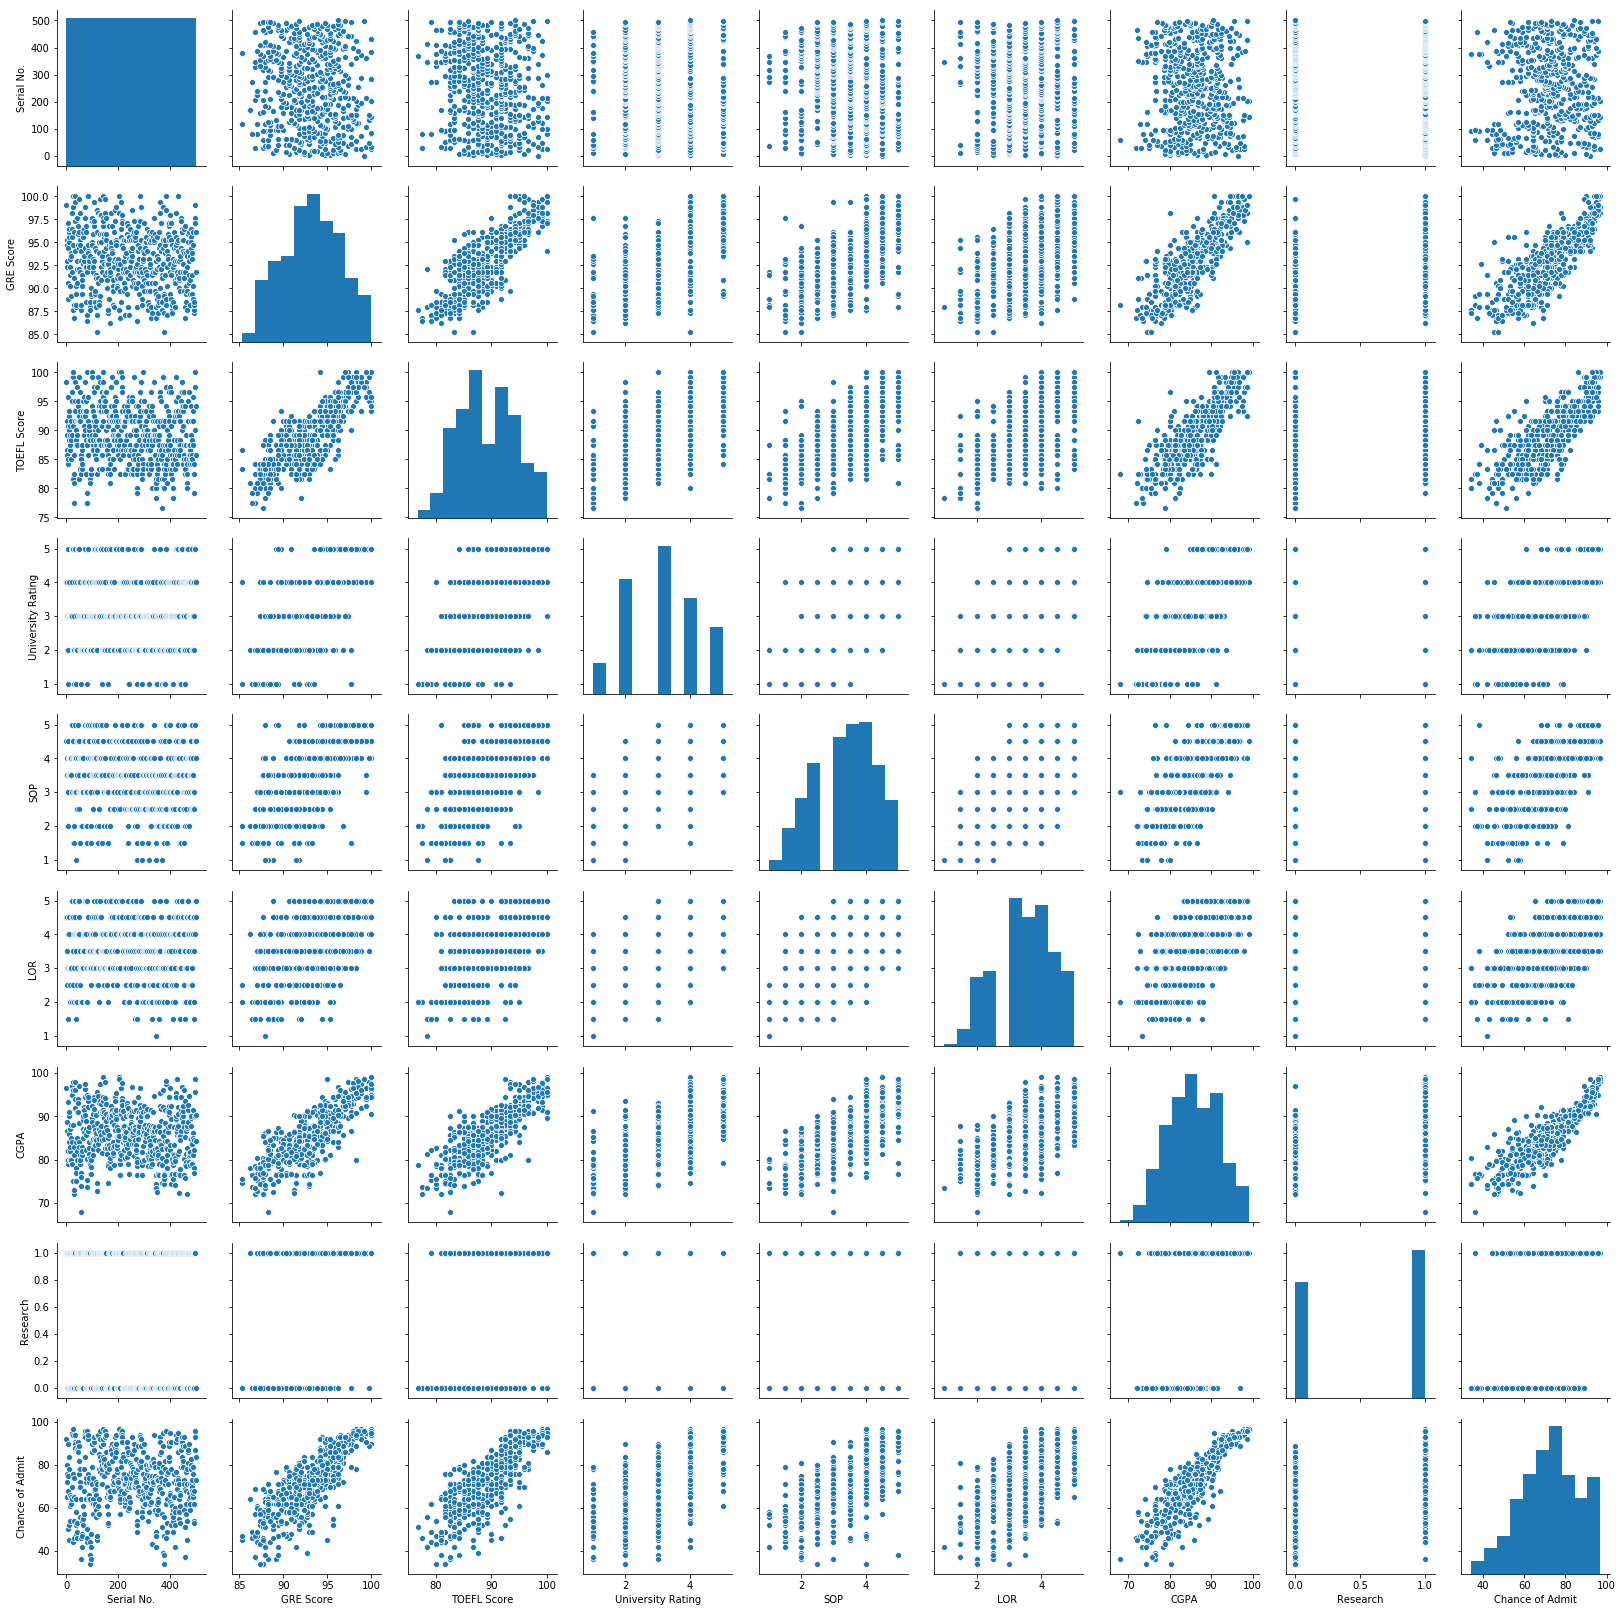

In [115]:
sns.pairplot(data)

In [148]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,99.117647,98.333333,4,4.5,4.5,96.5,1,92.0
1,2,95.294118,89.166667,4,4.0,4.5,88.7,1,76.0
2,3,92.941176,86.666667,3,3.0,3.5,80.0,1,72.0
3,4,94.705882,91.666667,3,3.5,2.5,86.7,1,80.0
4,5,92.352941,85.833333,2,2.0,3.0,82.1,0,65.0
5,6,97.058824,95.833333,5,4.5,3.0,93.4,1,90.0
6,7,94.411765,90.833333,3,3.0,4.0,82.0,1,75.0
7,8,90.588235,84.166667,2,3.0,4.0,79.0,0,68.0
8,9,88.823529,85.000000,1,2.0,1.5,80.0,0,50.0
9,10,95.000000,90.000000,3,3.5,3.0,86.0,0,45.0


In [160]:
X = data[['GRE Score','TOEFL Score','CGPA']]
y = data['Chance of Admit']

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [162]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
coeff_df = pd.DataFrame(linreg.coef_, X.columns,columns=['Coeff'])
coeff_df

,Coeff
GRE Score,0.002426
TOEFL Score,0.003033
CGPA,0.143863


In [164]:
y_pred = linreg.predict(X_test)

In [165]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head(25)

,Actual,Predicted
93,0.44,0.555073
365,0.86,0.862582
100,0.71,0.719797
161,0.53,0.493439
212,0.95,0.970685
372,0.95,0.957045
151,0.94,0.889327
114,0.59,0.685604
447,0.84,0.791348
333,0.71,0.727061


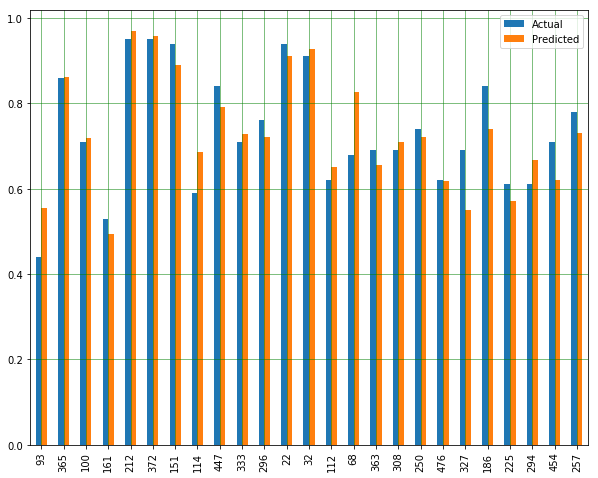

In [166]:
import matplotlib.pyplot as plt
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [167]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.77639332458


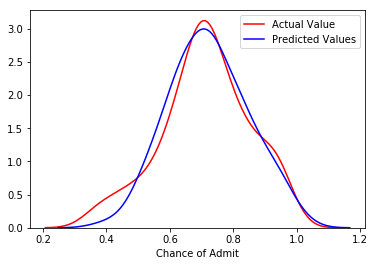

In [168]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [169]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0467259918879
Mean Squared Error: 0.00427656487402
Root Mean Squared Error: 0.0653954499489
